# <font style="color:rgb(50,120,229)"> Application 2 - Desaturation Filter</font>

Photo editing apps like photoshop or instagram use many different kinds of image enhancement techniques to make the images look special. One such image enhancement technique is desaturation. We desaturate the image by decreasing the values in the Saturation channel. This result in an image which looks faded or washed out, with no colors. This effect is used in many instagram filters. You will get your chance of designing some of these filters in the project next week.

In this program, we will desaturate a given image using the S channel of the HSV image.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.interpolation']='bilinear'

In [3]:
filename = DATA_PATH+"images/girl.jpg"
img = cv2.imread(filename)

Next, we convert the image to HSV color space using the `cvtColor` function, convert the `hsvImage` to `float32` and split the image into its channels H, S, V.

In [4]:
# Specify scaling factor
saturationScale = 0.01

# Convert to HSV color space
hsvImage = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# Convert to float32
hsvImage = np.float32(hsvImage)

# Split the channels
H, S, V = cv2.split(hsvImage)

Next, we scale the S channel with a scale factor and merge the channels back to get the final output. 

We need to convert to the `uint8` datatype since we had done the multiplication in `float32`. 

In [5]:
# Multiply S channel by scaling factor and clip the values to stay in 0 to 255 
S = np.clip(S * saturationScale , 0, 255)

# Merge the channels and show the output
hsvImage = np.uint8( cv2.merge([H, S, V]) )
imSat = cv2.cvtColor(hsvImage, cv2.COLOR_HSV2BGR)

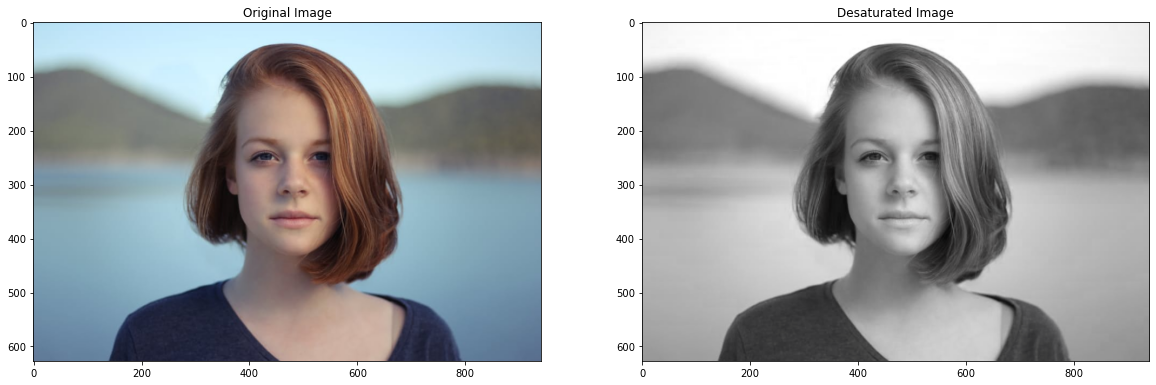

In [6]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title('Original Image')
plt.subplot(122);plt.imshow(imSat[...,::-1]);plt.title('Desaturated Image');